In [1]:
# Let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/marketing_campaigns_clean.csv')

¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?


Objetivo: Analiza la distribución de canales y compara su rendimiento en términos de ROI y otros indicadores clave.

Enfoque sugerido: Combina análisis de frecuencia con métricas de rendimiento para identificar no solo los canales más utilizados sino también los más efectivos. Considera segmentar por tipo de campaña o audiencia para un análisis más detallado.

Visualizaciones recomendadas: Gráfico de barras para frecuencia y diagrama de caja para distribución de ROI por canal

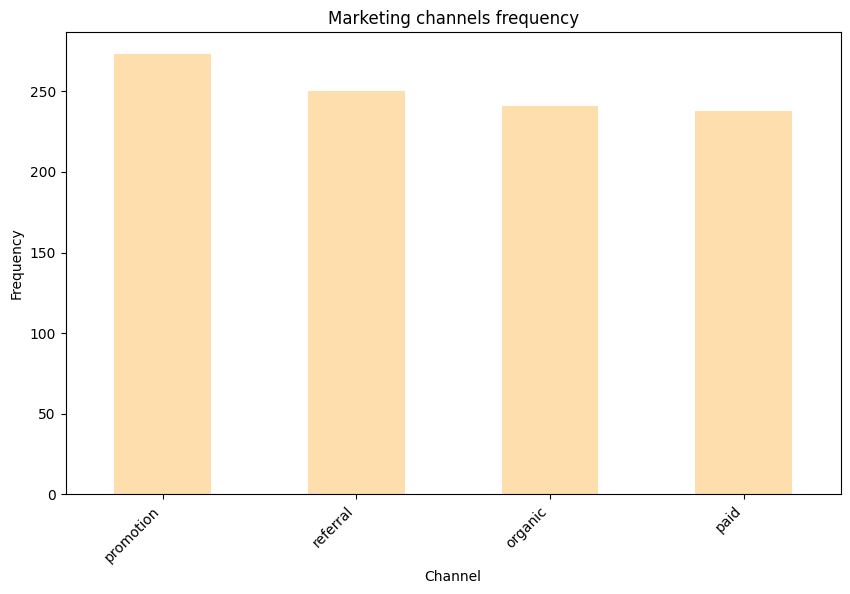

More frequent channels:
channel
promotion    273
referral     250
organic      241
paid         238
Name: count, dtype: int64


C:\Users\ignac\AppData\Local\Temp\ipykernel_13976\2643853156.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'channel', y = 'roi', data = df, palette = 'pastel')


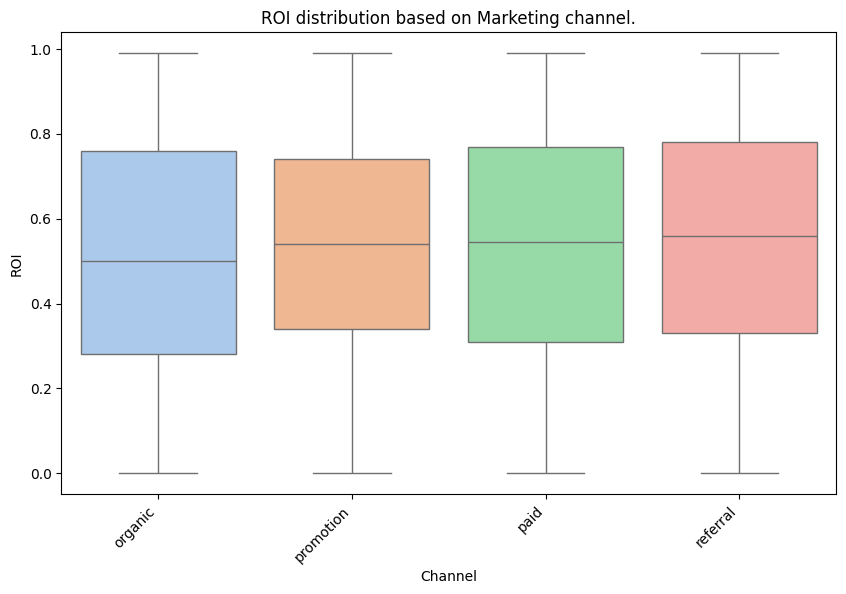

Best ROI per channel:


channel
referral     0.551560
paid         0.540210
promotion    0.535714
organic      0.517801
Name: roi, dtype: float64

In [11]:
# Let's calculate the most frequent channel
channel_frequency = df['channel'].value_counts()

# Now the roi per kind of channel
roi_by_channel = df.groupby('channel')['roi'].mean().sort_values(ascending=False)

# We will use a barplot for checking the frequency
plt.figure(figsize = (10,6))
channel_frequency.plot(kind ='bar', color = 'navajowhite')
plt.title('Marketing channels frequency')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print("More frequent channels:")
print(channel_frequency)


# And we will use a boxplot for analyzing the roi distribution based on the channel
plt.figure(figsize = (10,6))
sns.boxplot(x = 'channel', y = 'roi', data = df, palette = 'pastel')
plt.title('ROI distribution based on Marketing channel.')
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print("Best ROI per channel:")
roi_by_channel